In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.2)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
FolderName = '/Users/seetha/Box Sync/MultiDayData/Data/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/PV_correlation/'

In [3]:
animalname = 'CFC17'

## Load data

In [6]:
pf_data = [f for f in os.listdir(os.path.join(FolderName, animalname, 'Behavior')) if
             (f.endswith('.mat') and 'PlaceFields' in f and 'GoodBehavior' in f and 'Task3' in f)][0]

task1_data = scipy.io.loadmat(os.path.join(FolderName, animalname, 'Behavior', pf_data))

In [7]:
pf_data = [f for f in os.listdir(os.path.join(FolderName, animalname, 'Behavior')) if
             (f.endswith('.mat') and 'PlaceFields' in f and 'GoodBehavior' in f and 'Task4' in f)][0]

task2_data = scipy.io.loadmat(os.path.join(FolderName, animalname, 'Behavior', pf_data))

In [16]:
pf_params = pd.read_csv(
            os.path.join(FolderName, animalname, 'PlaceCells', f'%s_placecellparams_df.csv' % animalname), index_col=0)

cells = pf_params.loc[(pf_params['Reliability']>0.5) & (pf_params['Task'].isin(['Task3', 'Task4'])), 'CellNumber'].to_numpy()

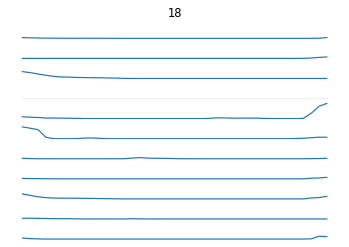

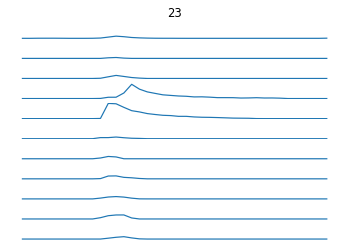

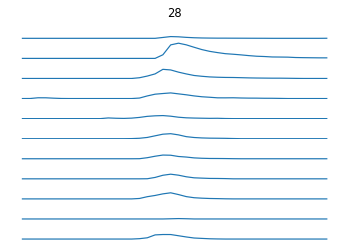

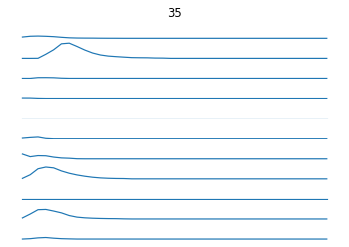

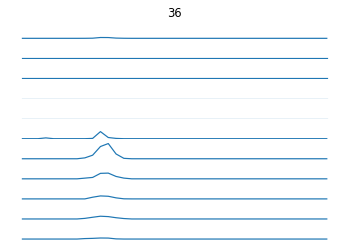

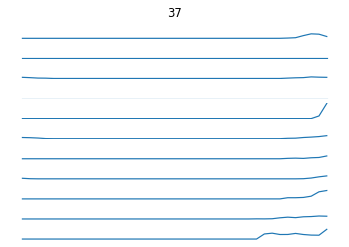

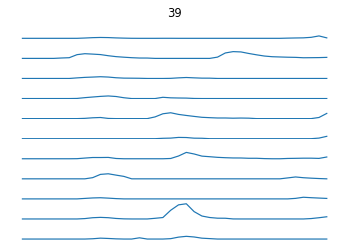

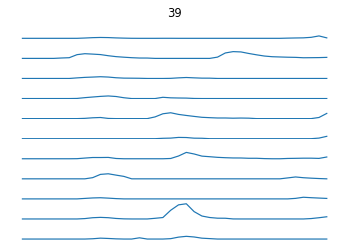

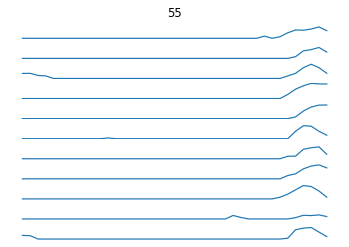

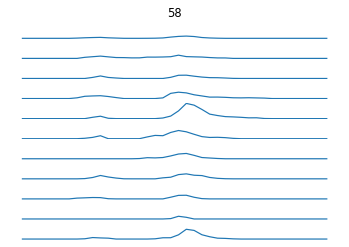

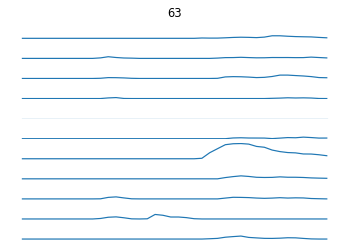

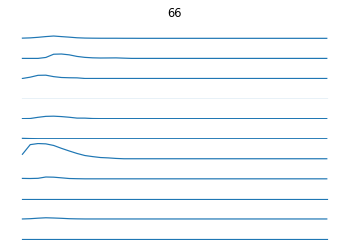

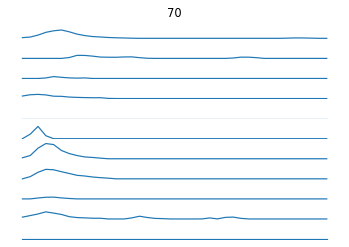

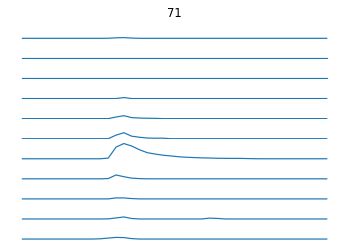

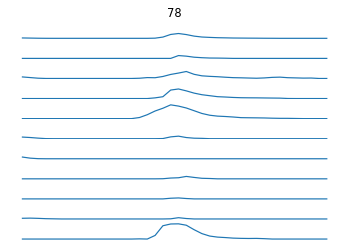

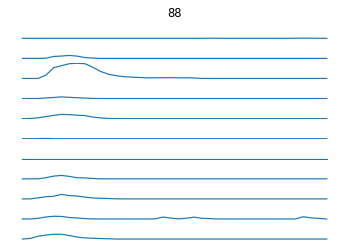

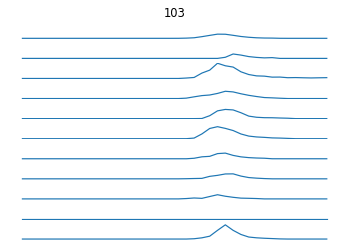

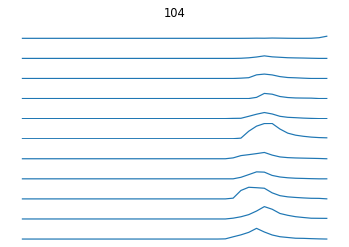

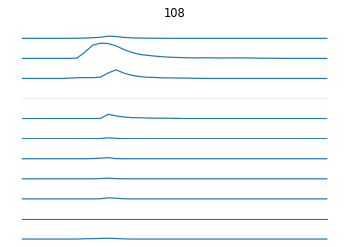

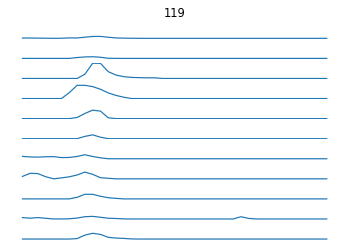

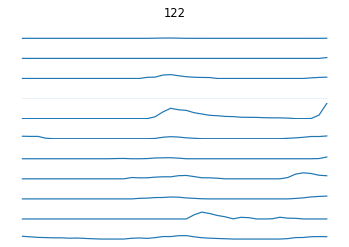

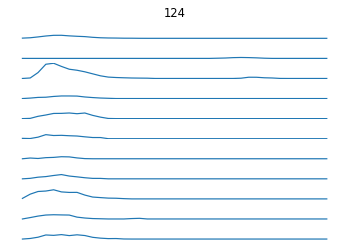

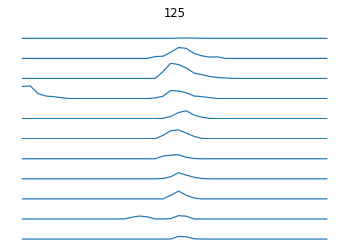

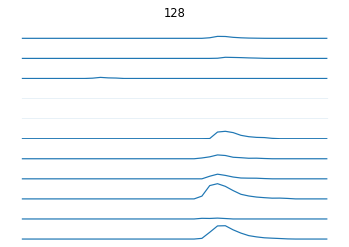

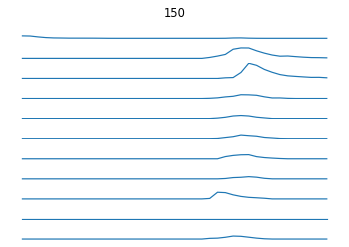

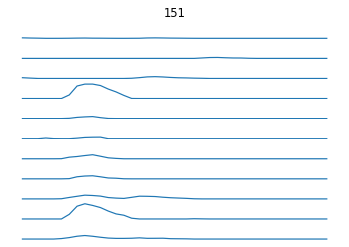

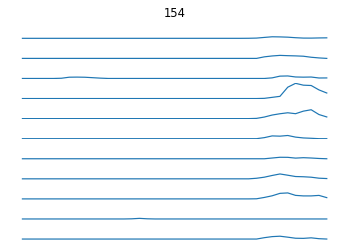

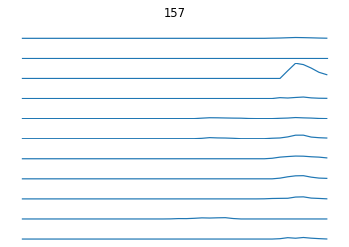

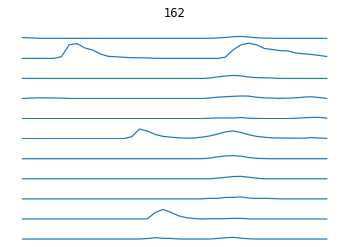

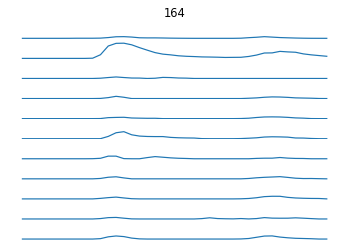

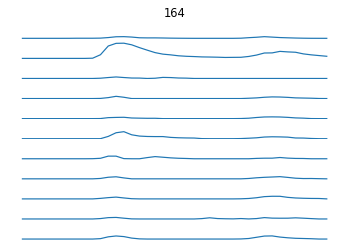

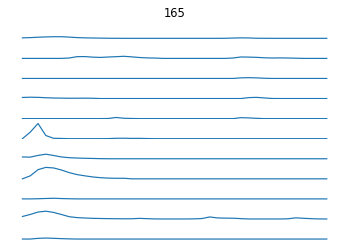

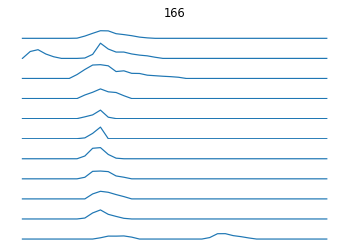

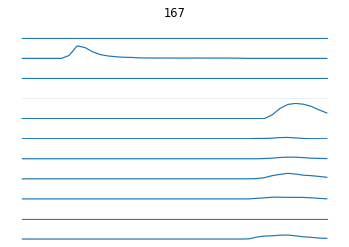

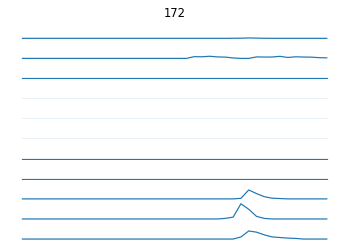

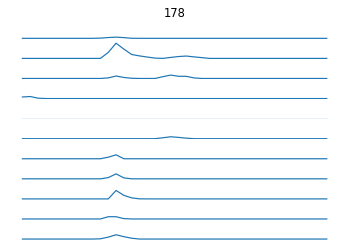

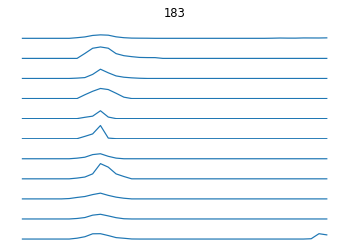

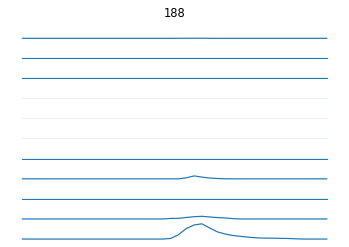

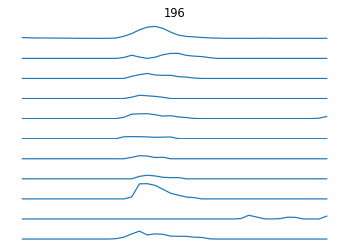

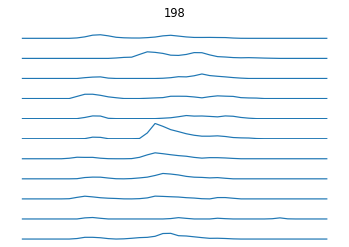

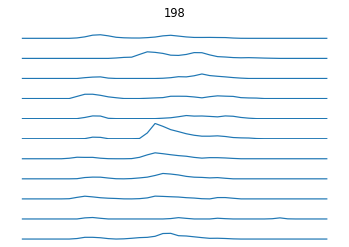

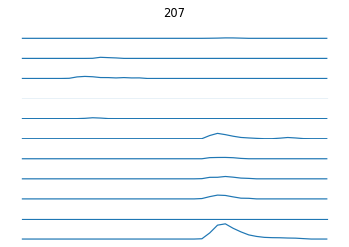

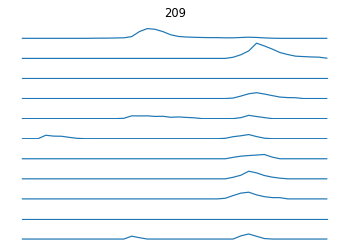

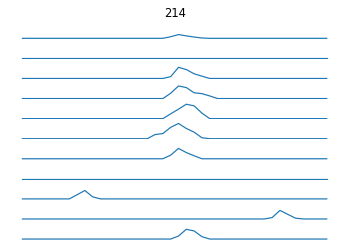

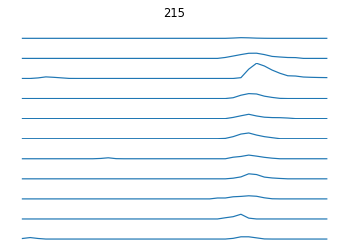

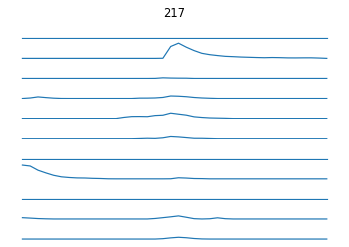

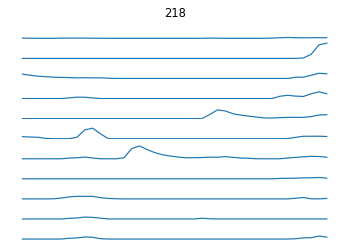

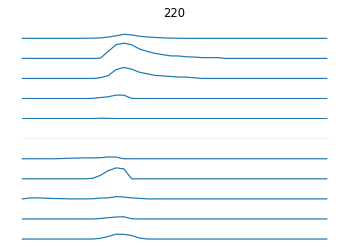

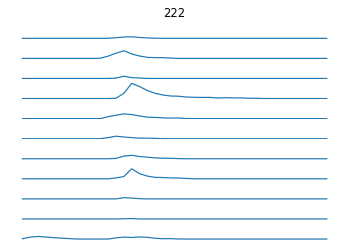

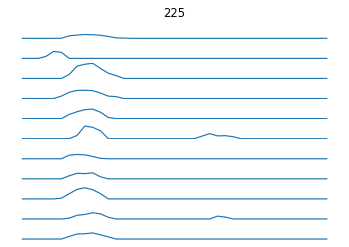

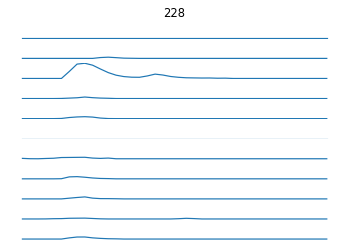

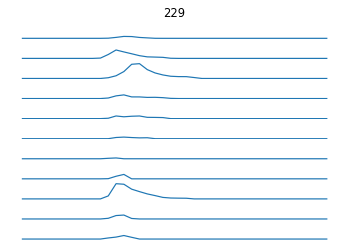

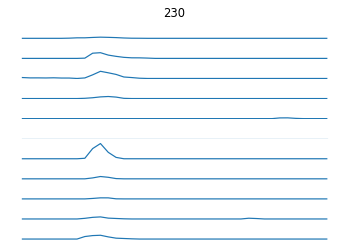

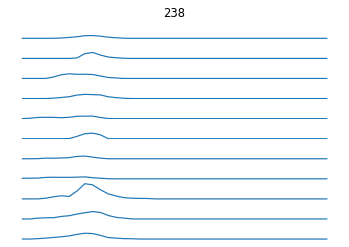

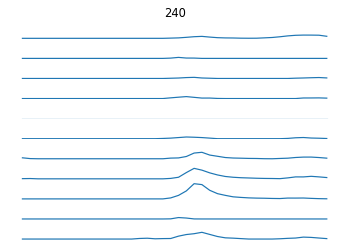

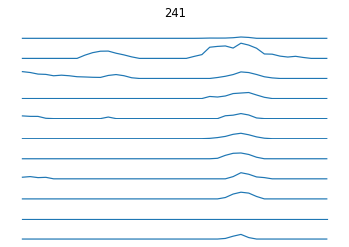

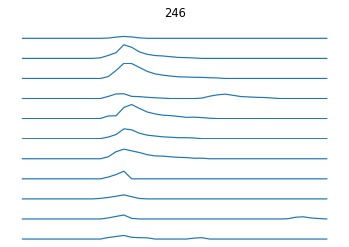

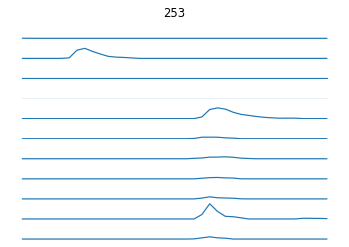

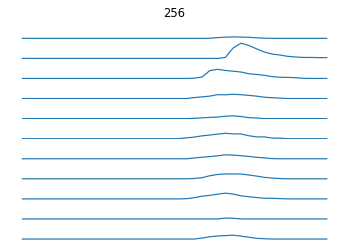

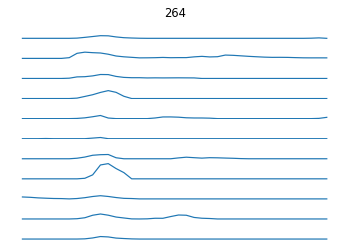

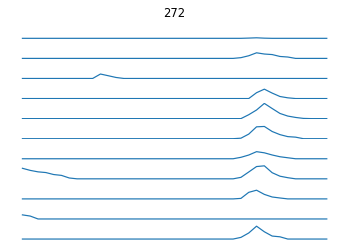

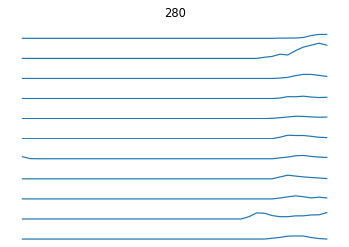

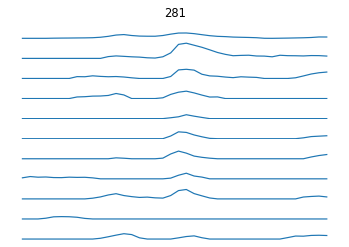

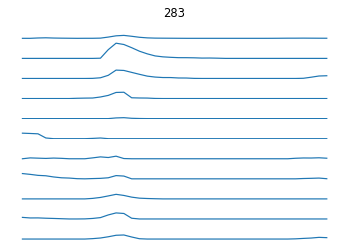

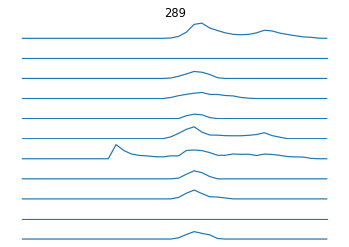

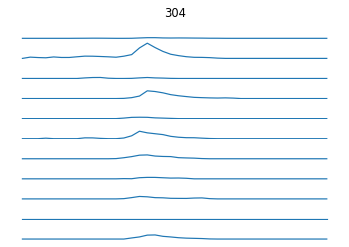

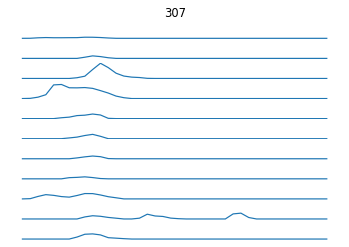

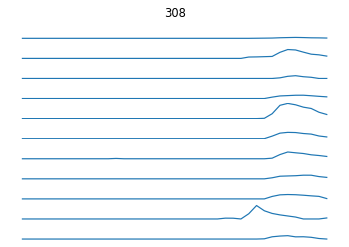

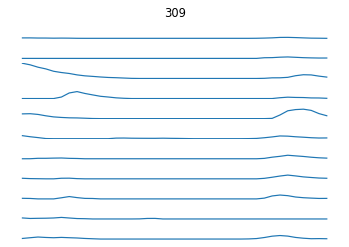

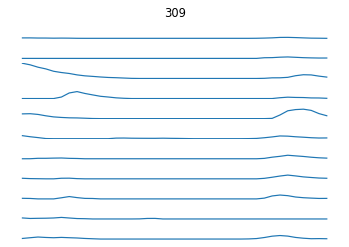

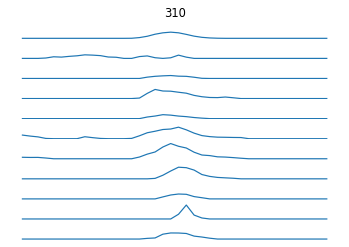

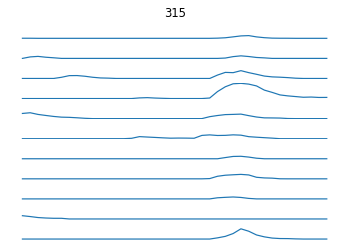

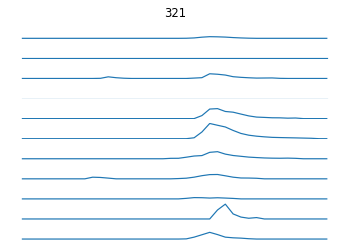

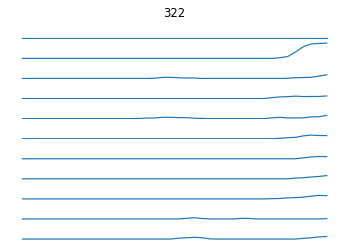

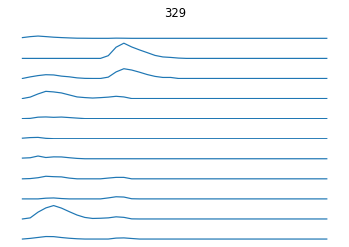

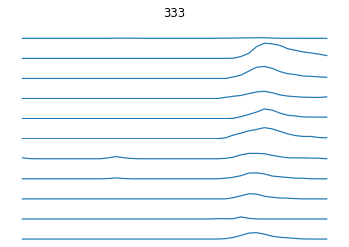

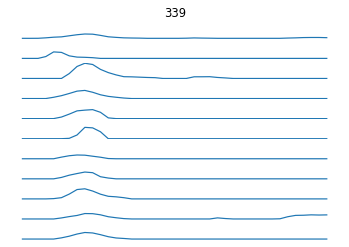

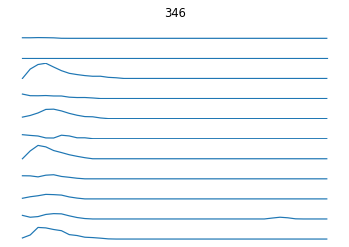

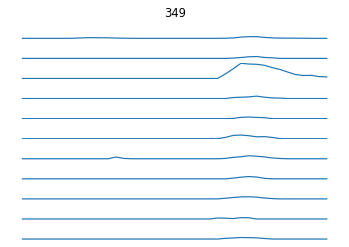

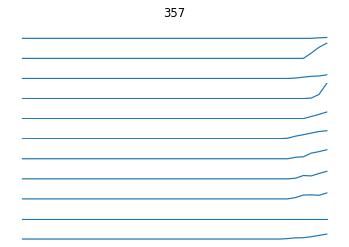

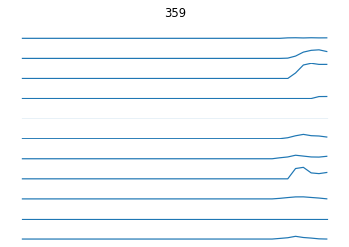

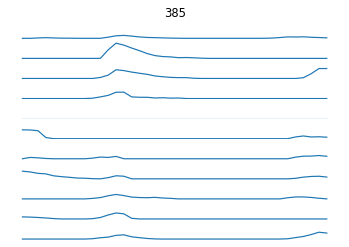

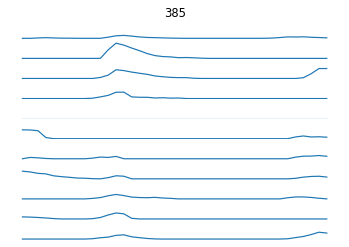

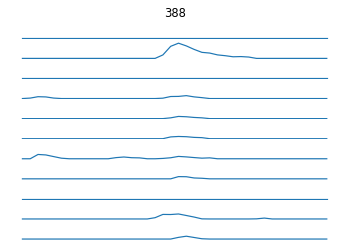

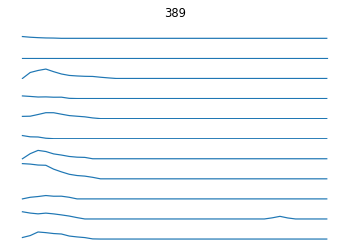

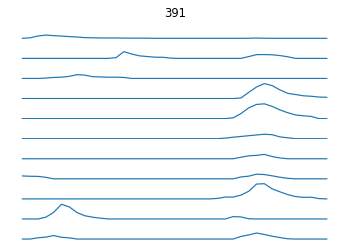

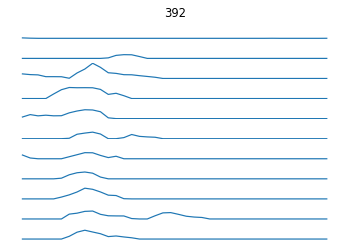

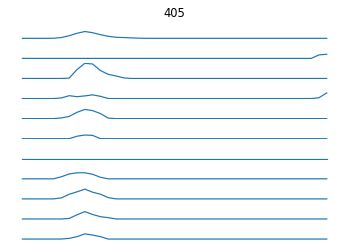

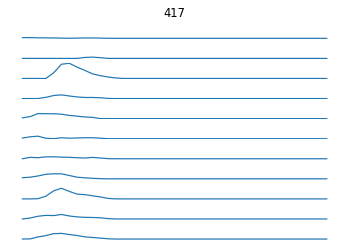

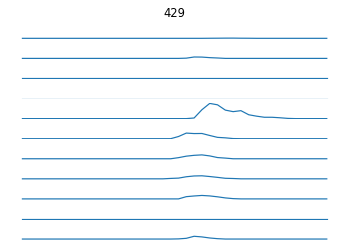

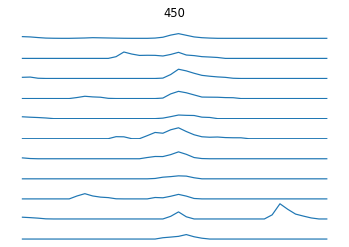

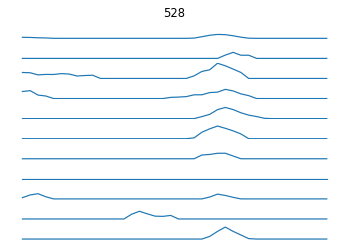

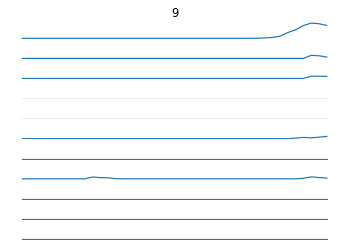

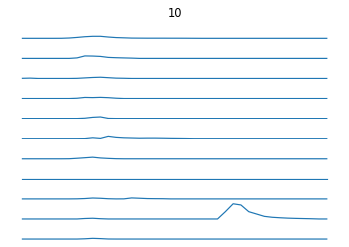

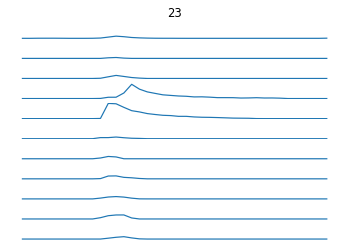

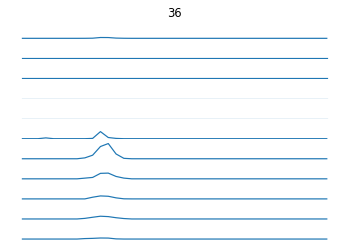

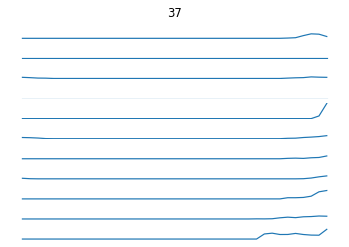

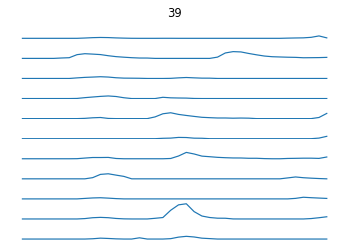

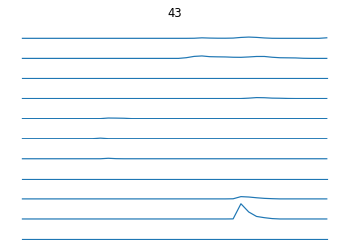

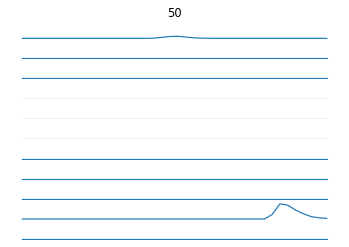

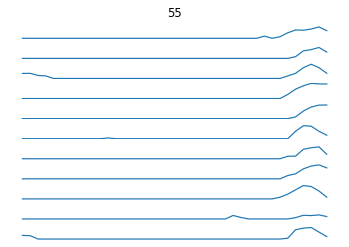

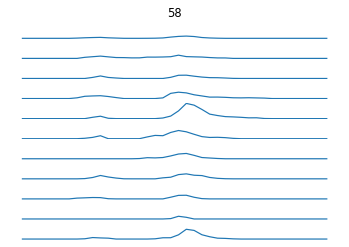

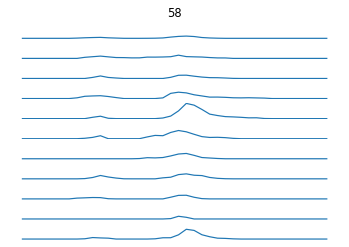

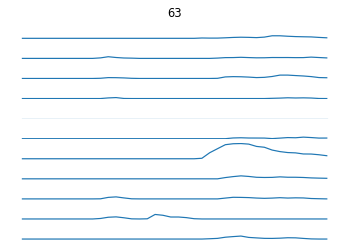

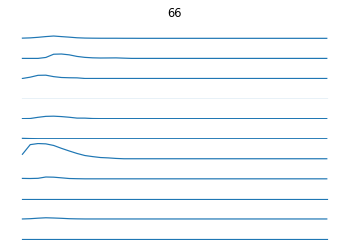

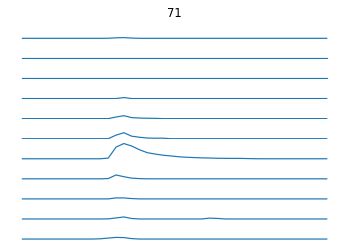

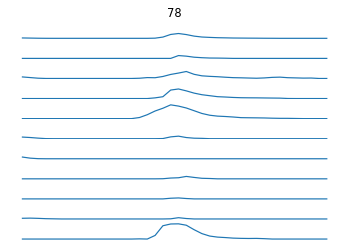

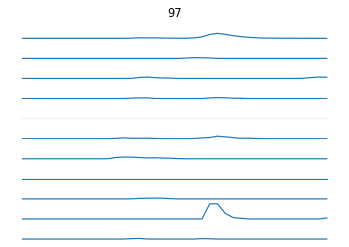

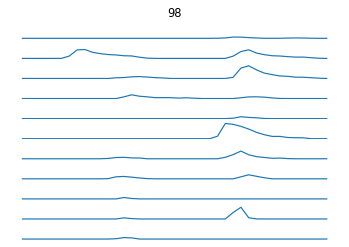

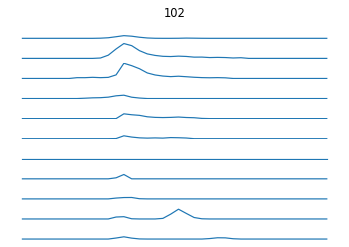

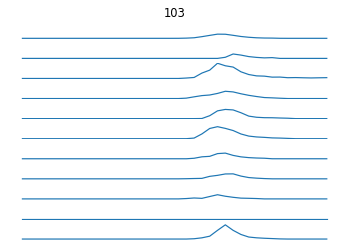

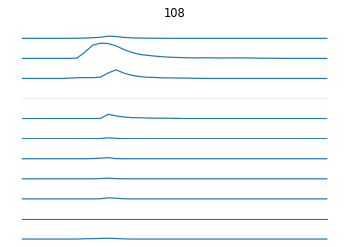

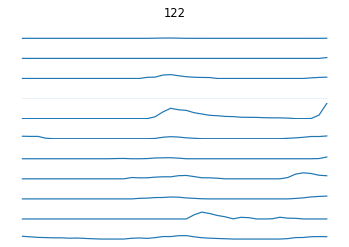

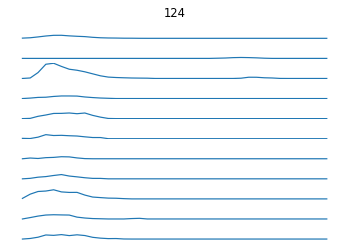

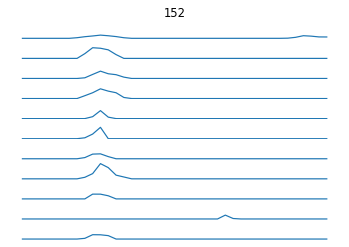

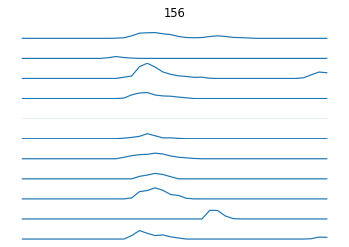

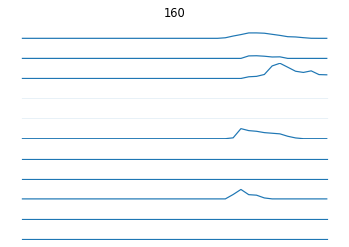

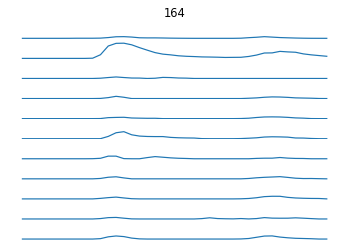

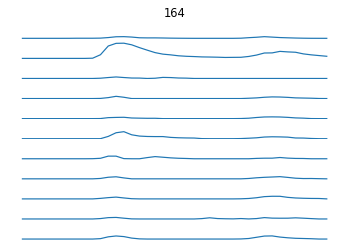

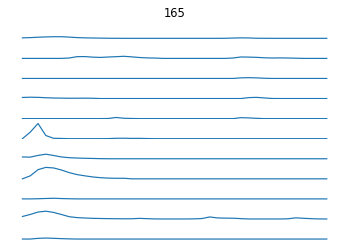

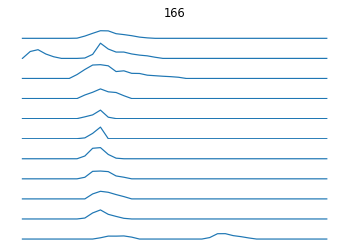

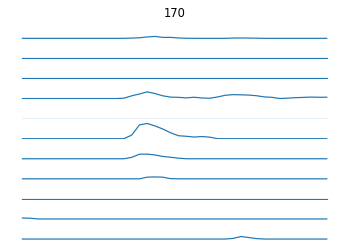

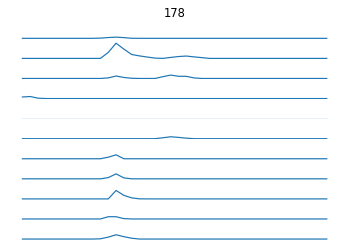

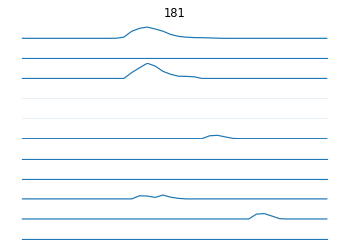

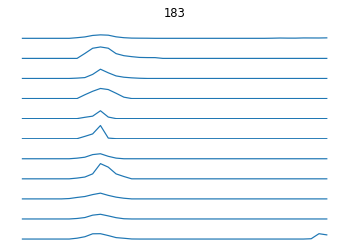

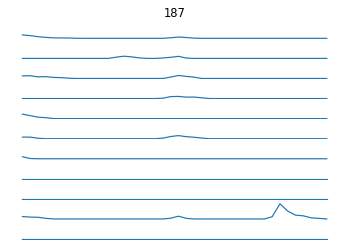

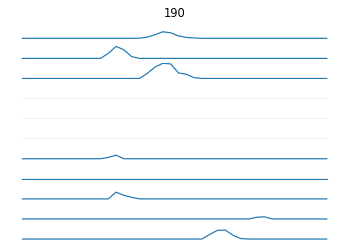

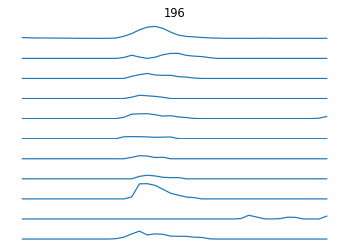

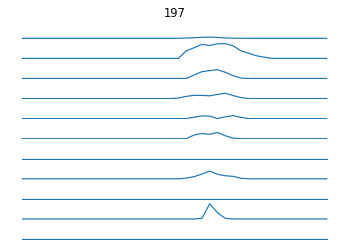

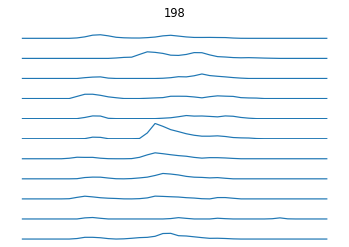

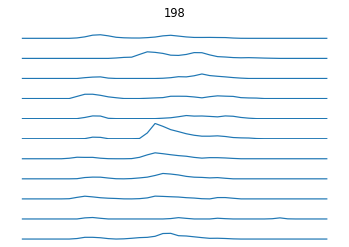

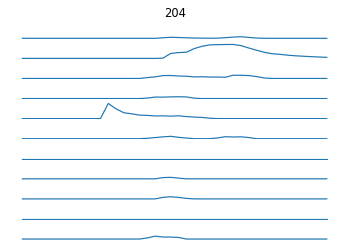

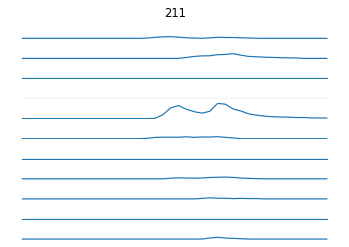

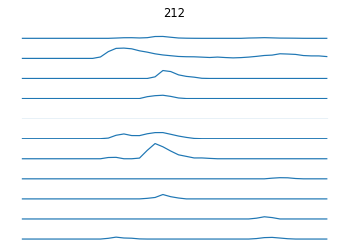

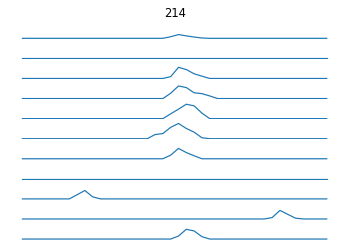

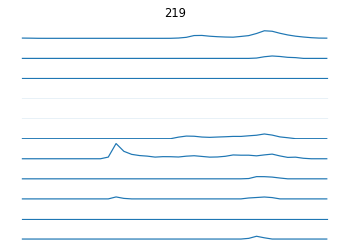

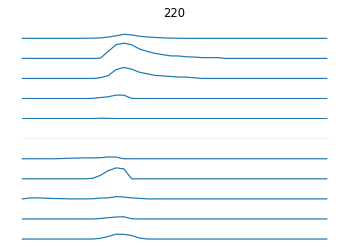

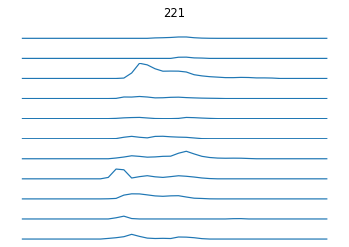

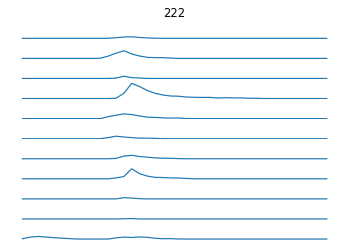

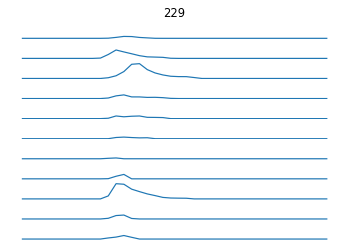

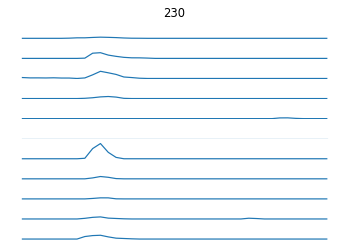

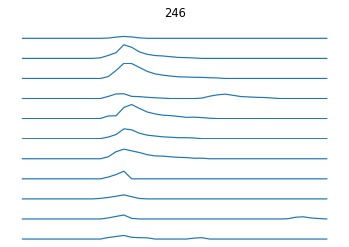

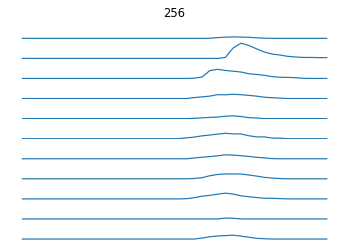

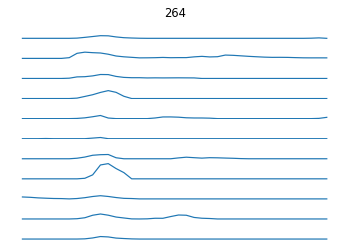

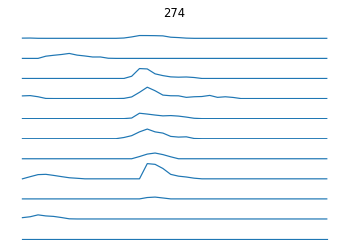

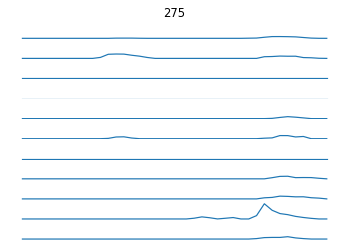

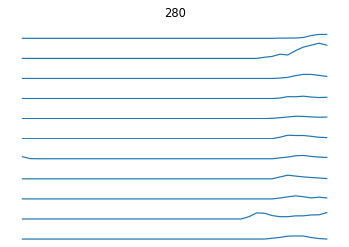

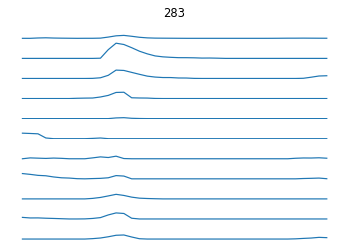

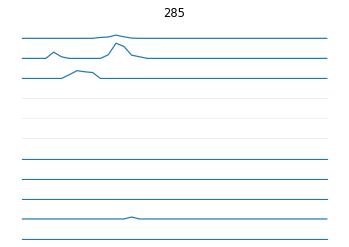

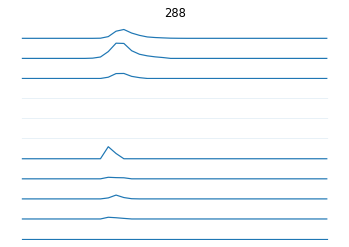

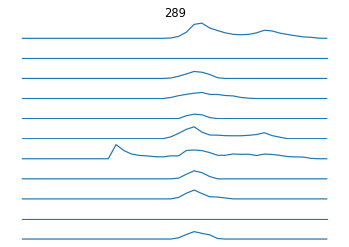

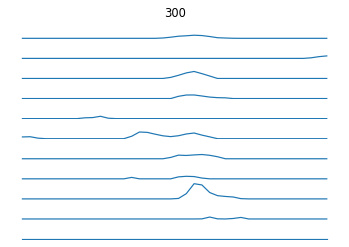

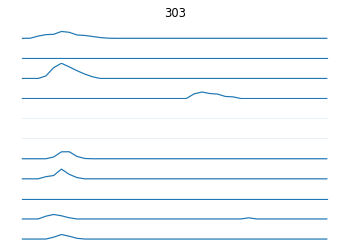

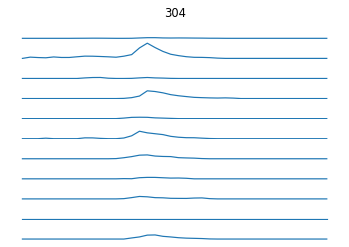

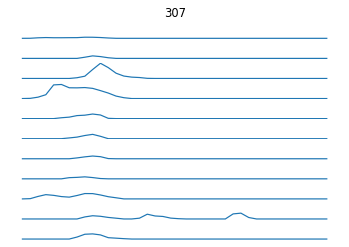

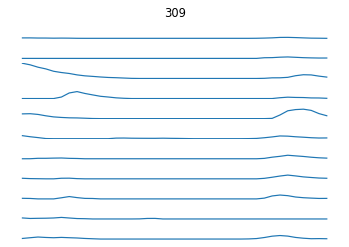

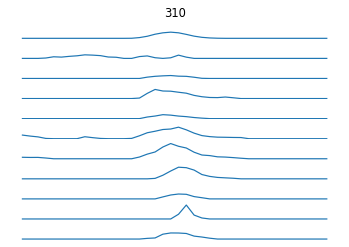

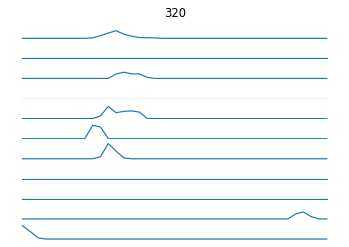

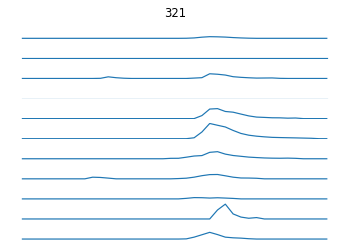

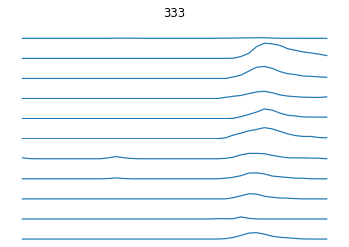

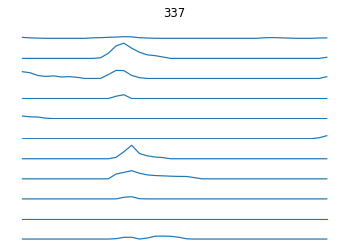

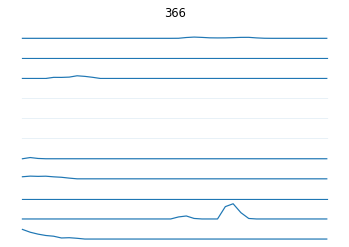

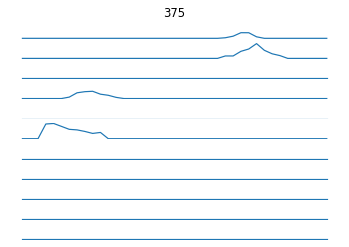

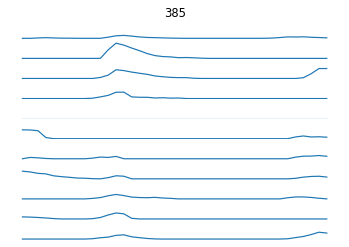

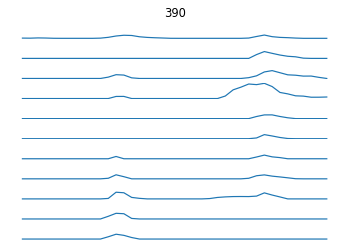

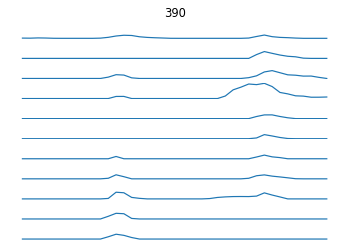

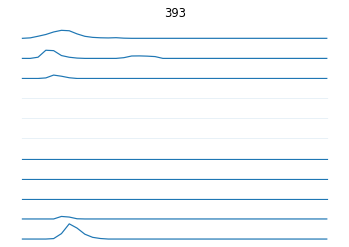

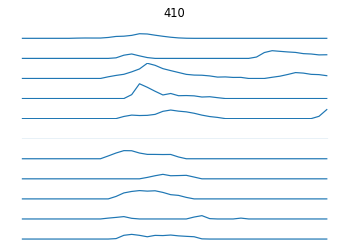

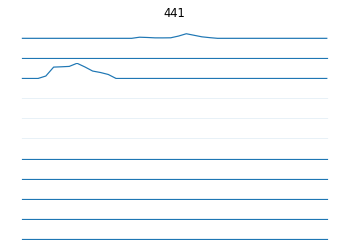

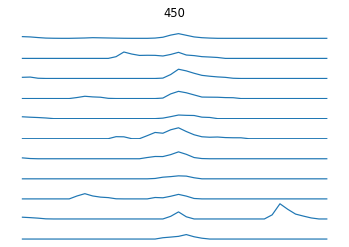

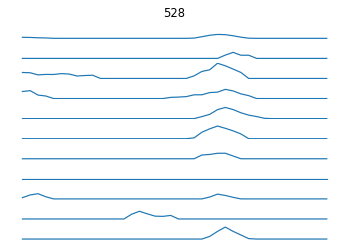

In [17]:
for n1, c in enumerate(cells):
    fs, ax = plt.subplots(11, sharex=True, sharey=True)
    ax[0].plot(np.mean(task1_data['Allbinned_F'][0][c][:, -5:], 1))
    ax[0].set_title(c)
    for i in np.arange(1, 11):
        ax[i].plot(task2_data['Allbinned_F'][0][c][:, i-1])
    for a in ax:
        a.axis('off')

lap 0, corr -0.11 max 0.12
lap 1, corr nan max 0.00
lap 2, corr -0.08 max 0.04
lap 3, corr 0.74 max 0.03
lap 4, corr -0.15 max 0.03
lap 5, corr -0.06 max 0.03
lap 6, corr -0.04 max 0.06
lap 7, corr -0.06 max 0.05
lap 8, corr nan max 0.00
lap 9, corr 0.08 max 0.04


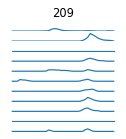

In [22]:
fs, ax = plt.subplots(11, sharex=True, sharey=True, figsize=(3, 3))
c = 209
d1 = np.mean(task1_data['Allbinned_F'][0][c][:, -10:], 1)
ax[0].plot(d1)
ax[0].set_title(c)
for i in np.arange(1, 11):
    d2 = task2_data['Allbinned_F'][0][c][:, i-1]
    ax[i].plot(d2)
    print('lap %d, corr %0.2f max %0.2f' %(i-1, np.corrcoef(d1, d2)[0, 1], np.max(d2)))
    
for a in ax:
    a.axis('off')
fs.set_size_inches((2, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Examplelapwiseactivity_Task3.pdf'), bbox_inches='tight', dpi=300)